Задание.

Построение модели классификации

    Обзор обучающего датасета
    Обработка выбросов
    Обработка пропусков

In [479]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt

In [480]:
from sklearn.preprocessing import LabelEncoder

Загружаем датасет.
Делаем предварительный обзор дата сета.

In [481]:
df_train = pd.read_csv('/home/mikhail/Рабочий стол/DS_02/course_project/course_project_train.csv')

In [482]:
def view_matrix_in(df_train):
    
    '''показывает пропуски по колонкам сета и общую информацию о сете'''

    msno.matrix(df_train) 
    display("/usr/local/share/datasets/matrix_sorted.png")
    print(df_train.head())
    print(len(df_train) - df_train.count(), df_train.info())

'/usr/local/share/datasets/matrix_sorted.png'

  Home Ownership  Annual Income Years in current job  Tax Liens  \
0       Own Home       482087.0                  NaN        0.0   
1       Own Home      1025487.0            10+ years        0.0   
2  Home Mortgage       751412.0              8 years        0.0   
3       Own Home       805068.0              6 years        0.0   
4           Rent       776264.0              8 years        0.0   

   Number of Open Accounts  Years of Credit History  Maximum Open Credit  \
0                     11.0                     26.3             685960.0   
1                     15.0                     15.3            1181730.0   
2                     11.0                     35.0            1182434.0   
3                      8.0                     22.5             147400.0   
4                     13.0                     13.6             385836.0   

   Number of Credit Problems  Months since last delinquent  Bankruptcies  \
0                        1.0                           NaN      

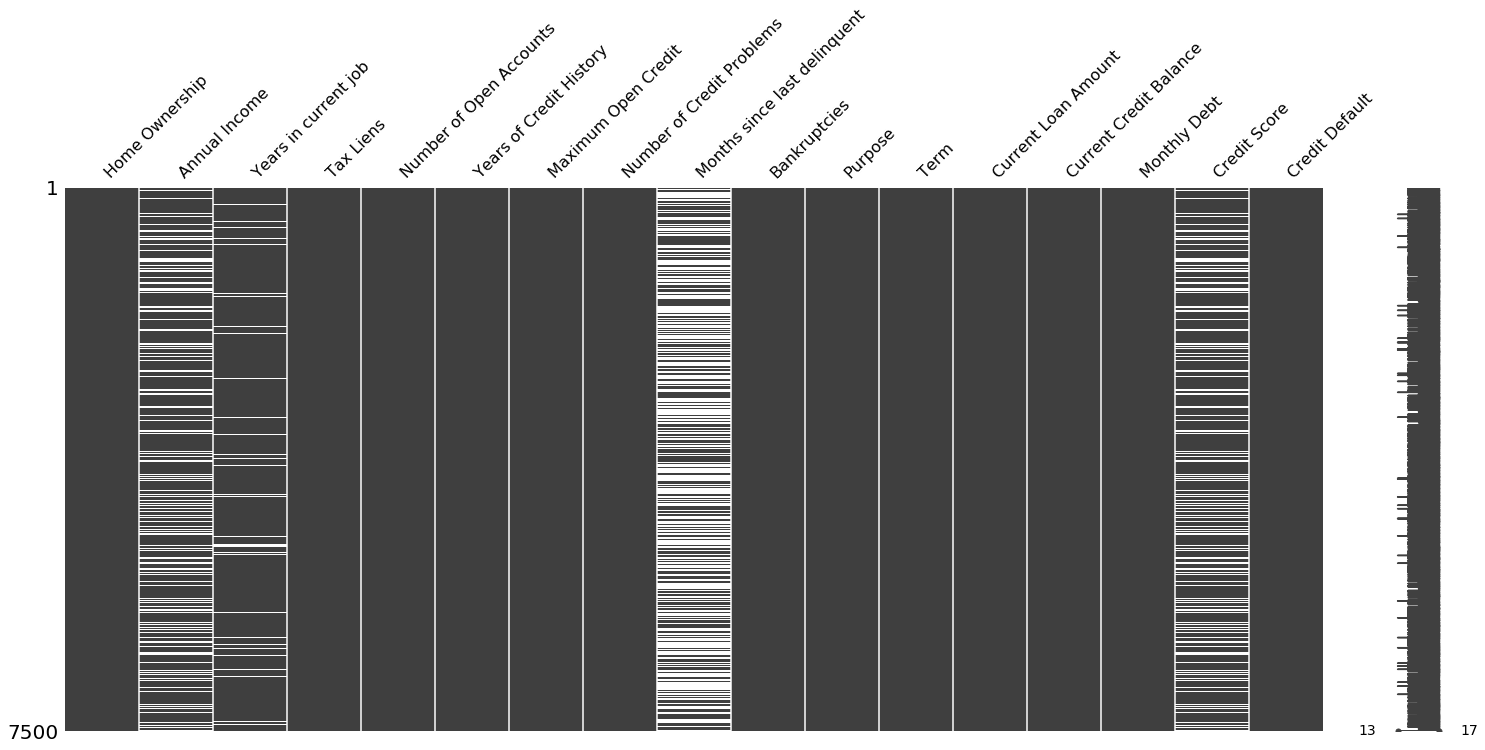

In [483]:
view_matrix_in(df_train)

In [484]:
df_train.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


In [485]:
for cat_colname in df_train.select_dtypes(include='object').columns:
    print(str(cat_colname) + '\n\n' + str(df_train[cat_colname].value_counts()) + '\n' + '*' * 100 + '\n')

Home Ownership

Home Mortgage    3637
Rent             3204
Own Home          647
Have Mortgage      12
Name: Home Ownership, dtype: int64
****************************************************************************************************

Years in current job

10+ years    2332
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
8 years       339
9 years       259
Name: Years in current job, dtype: int64
****************************************************************************************************

Purpose

debt consolidation      5944
other                    665
home improvements        412
business loan            129
buy a car                 96
medical bills             71
major purchase            40
take a trip               37
buy house                 34
small business            26
wedding                   15
moving                    11
educational expenses      10
vacation  

In [486]:
df_train.describe()

,Annual Income,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,5.943000e+03,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,3419.000000,7486.000000,7.500000e+03,7.500000e+03,7500.000000,5943.000000,7500.000000
mean,1.366392e+06,0.030133,11.130933,18.317467,9.451537e+05,0.170000,34.692600,0.117152,1.187318e+07,2.898332e+05,18314.454133,1151.087498,0.281733
std,8.453392e+05,0.271604,4.908924,7.041946,1.602622e+07,0.498598,21.688806,0.347192,3.192612e+07,3.178714e+05,11926.764673,1604.451418,0.449874
min,1.645970e+05,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,1.124200e+04,0.000000e+00,0.000000,585.000000,0.000000
25%,8.443410e+05,0.000000,8.000000,13.500000,2.792295e+05,0.000000,16.000000,0.000000,1.801690e+05,1.142565e+05,10067.500000,711.000000,0.000000
50%,1.168386e+06,0.000000,10.000000,17.000000,4.781590e+05,0.000000,32.000000,0.000000,3.095730e+05,2.093230e+05,16076.500000,731.000000,0.000000
75%,1.640137e+06,0.000000,14.000000,21.800000,7.935015e+05,0.000000,50.000000,0.000000,5.198820e+05,3.604062e+05,23818.000000,743.000000,1.000000
max,1.014934e+07,7.000000,43.000000,57.700000,1.304726e+09,7.000000,118.000000,4.000000,1.000000e+08,6.506797e+06,136679.000000,7510.000000,1.000000




В колонках:
Annual Income, Years in current job, Months since last delinquent, Bankruptcies, Credit Score
есть пропущенные значения.

Обработаем их заполняя либо нулевыми, либо средними значениями.



In [487]:
def prepare_deal_df(df_train): 
    """функция обрабатывающая пустые ячейки"""
    
        
    df_train['Months since last delinquent'] = df_train['Months since last delinquent'].fillna(0.0)    
    df_train['Bankruptcies'] = df_train['Bankruptcies'].fillna(0.0)
    df_train['Years in current job'] = df_train['Years in current job'].fillna(0.0)
    
    df_train_mean_annual = df_train['Annual Income'].mean()
    df_train['Annual Income'] = df_train['Annual Income'].fillna(df_train_mean_annual)
    
    df_train_mean_cs = df_train['Credit Score'].mean()
    df_train['Credit Score'] = df_train['Credit Score'].fillna(df_train_mean_cs)
    
    return df_train


Строковым значениям присвоим метки

In [501]:
def prepare_label(df_train):
    '''функция преобразующая строковые объекты в метки'''
    
    le = LabelEncoder()

    for col in df_train.columns:       
        if df_train[col].dtypes=='object':
            df_train[col]=le.fit_transform(df_train[col].astype(str))
    return df_train        

In [489]:
prepare_label(df_train) # присваиваем метки для строковых значений

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,2,482087.0,11,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,3,1,99999999.0,47386.0,7914.0,749.0,0
1,2,1025487.0,1,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,3,0,264968.0,394972.0,18373.0,737.0,1
2,1,751412.0,8,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,3,1,99999999.0,308389.0,13651.0,742.0,0
3,2,805068.0,6,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,3,1,121396.0,95855.0,11338.0,694.0,0
4,3,776264.0,8,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,3,1,125840.0,93309.0,7180.0,719.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,3,402192.0,10,0.0,3.0,8.5,107866.0,0.0,NaN,0.0,9,1,129360.0,73492.0,1900.0,697.0,0
7496,1,1533984.0,0,0.0,10.0,26.5,686312.0,0.0,43.0,0.0,3,0,444048.0,456399.0,12783.0,7410.0,1
7497,3,1878910.0,6,0.0,12.0,32.1,1778920.0,0.0,NaN,0.0,1,1,99999999.0,477812.0,12479.0,748.0,0
7498,1,NaN,11,0.0,21.0,26.5,1141250.0,0.0,NaN,0.0,3,1,615274.0,476064.0,37118.0,NaN,0


In [490]:
prepare_deal_df(df_train) # обрабатываем пропуски в сете 

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,2,4.820870e+05,11,0.0,11.0,26.3,685960.0,1.0,0.0,1.0,3,1,99999999.0,47386.0,7914.0,749.000000,0
1,2,1.025487e+06,1,0.0,15.0,15.3,1181730.0,0.0,0.0,0.0,3,0,264968.0,394972.0,18373.0,737.000000,1
2,1,7.514120e+05,8,0.0,11.0,35.0,1182434.0,0.0,0.0,0.0,3,1,99999999.0,308389.0,13651.0,742.000000,0
3,2,8.050680e+05,6,0.0,8.0,22.5,147400.0,1.0,0.0,1.0,3,1,121396.0,95855.0,11338.0,694.000000,0
4,3,7.762640e+05,8,0.0,13.0,13.6,385836.0,1.0,0.0,0.0,3,1,125840.0,93309.0,7180.0,719.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,3,4.021920e+05,10,0.0,3.0,8.5,107866.0,0.0,0.0,0.0,9,1,129360.0,73492.0,1900.0,697.000000,0
7496,1,1.533984e+06,0,0.0,10.0,26.5,686312.0,0.0,43.0,0.0,3,0,444048.0,456399.0,12783.0,7410.000000,1
7497,3,1.878910e+06,6,0.0,12.0,32.1,1778920.0,0.0,0.0,0.0,1,1,99999999.0,477812.0,12479.0,748.000000,0
7498,1,1.366392e+06,11,0.0,21.0,26.5,1141250.0,0.0,0.0,0.0,3,1,615274.0,476064.0,37118.0,1151.087498,0


In [502]:
df_train.describe() #смотрим конечный результат


,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
count,7500.000000,7.500000e+03,7500.000000,7500.000000,7500.000000,7500.000000,7.500000e+03,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7.500000e+03,7.500000e+03,7500.000000,7500.000000,7500.000000
mean,1.939067,1.366392e+06,4.018667,0.030133,11.130933,18.317467,9.451537e+05,0.170000,15.815200,0.116933,3.729333,0.740800,1.187318e+07,2.898332e+05,18314.454133,1151.087498,0.281733
std,0.956526,7.524812e+05,3.437658,0.271604,4.908924,7.041946,1.602622e+07,0.498598,22.649441,0.346904,2.076435,0.438225,3.192612e+07,3.178714e+05,11926.764673,1428.207201,0.449874
min,0.000000,1.645970e+05,0.000000,0.000000,2.000000,4.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.124200e+04,0.000000e+00,0.000000,585.000000,0.000000
25%,1.000000,9.311330e+05,1.000000,0.000000,8.000000,13.500000,2.792295e+05,0.000000,0.000000,0.000000,3.000000,0.000000,1.801690e+05,1.142565e+05,10067.500000,718.000000,0.000000
50%,2.000000,1.366392e+06,3.000000,0.000000,10.000000,17.000000,4.781590e+05,0.000000,0.000000,0.000000,3.000000,1.000000,3.095730e+05,2.093230e+05,16076.500000,738.000000,0.000000
75%,3.000000,1.499974e+06,7.000000,0.000000,14.000000,21.800000,7.935015e+05,0.000000,29.000000,0.000000,3.000000,1.000000,5.198820e+05,3.604062e+05,23818.000000,1151.087498,1.000000
max,3.000000,1.014934e+07,11.000000,7.000000,43.000000,57.700000,1.304726e+09,7.000000,118.000000,4.000000,14.000000,1.000000,1.000000e+08,6.506797e+06,136679.000000,7510.000000,1.000000


In [503]:
for cat_colname in df_train.columns:
    print(str(cat_colname) + '\n\n' + str(df_train[cat_colname].value_counts()) + '\n' + '*' * 100 + '\n')

Home Ownership

1    3637
3    3204
2     647
0      12
Name: Home Ownership, dtype: int64
****************************************************************************************************

Annual Income

1.366392e+06    1557
1.043651e+06       4
1.058376e+06       4
1.338113e+06       4
1.161660e+06       4
                ... 
1.141254e+06       1
7.907382e+06       1
1.534478e+06       1
9.720400e+05       1
1.654786e+06       1
Name: Annual Income, Length: 5479, dtype: int64
****************************************************************************************************

Years in current job

1     2332
2      705
3      620
10     563
5      516
0      504
4      469
6      426
7      396
11     371
8      339
9      259
Name: Years in current job, dtype: int64
****************************************************************************************************

Tax Liens

0.0    7366
1.0      83
2.0      30
3.0      10
4.0       6
5.0       2
6.0       2
7.0       1
Name: T

In [504]:
def prepare_missing_n_label(df_train):
    
    ''' сборная функция обрабатывающая пропуски и присваивающая метки'''
    
    prepare_deal_df(df_train)
    prepare_label(df_train)   
    return df_train   
    

In [494]:
df_test= pd.read_csv('/home/mikhail/Рабочий стол/DS_02/course_project/course_project_test.csv')

Обработаем данные в тестовом датасете

In [505]:
prepare_missing_n_label(df_test)

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
0,3,1.366922e+06,5,0.0,9.0,12.5,220968.0,0.0,70.0,0.0,3,1,162470.0,105906.0,6813.0,1234.51686
1,3,2.318380e+05,1,0.0,6.0,32.7,55946.0,0.0,8.0,0.0,4,1,78298.0,46037.0,2318.0,699.00000
2,1,1.152540e+06,4,0.0,10.0,13.7,204600.0,0.0,0.0,0.0,3,1,200178.0,146490.0,18729.0,7260.00000
3,1,1.220313e+06,2,0.0,16.0,17.0,456302.0,0.0,70.0,0.0,3,1,217382.0,213199.0,27559.0,739.00000
4,1,2.340952e+06,7,0.0,11.0,23.6,1207272.0,0.0,0.0,0.0,3,0,777634.0,425391.0,42605.0,706.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,1,1.020053e+06,2,0.0,14.0,29.1,559152.0,1.0,68.0,1.0,3,1,99999999.0,162735.0,15046.0,745.00000
2496,1,1.366922e+06,3,0.0,15.0,17.0,1737780.0,0.0,77.0,0.0,3,1,468512.0,1439269.0,32996.0,1234.51686
2497,1,1.171806e+06,3,0.0,48.0,12.8,1706430.0,0.0,0.0,0.0,3,1,430496.0,676438.0,36912.0,695.00000
2498,3,7.235200e+05,2,0.0,14.0,28.8,945780.0,0.0,0.0,0.0,3,1,257774.0,391248.0,13506.0,744.00000


In [506]:
def view_matrix_out(df_train, df_test):
    
    '''показывает пропуски по колонкам обработанного сета'''
    
    msno.matrix(df_train) 
    msno.matrix(df_test)
    
    display("/usr/local/share/datasets/matrix_sorted.png")

'/usr/local/share/datasets/matrix_sorted.png'

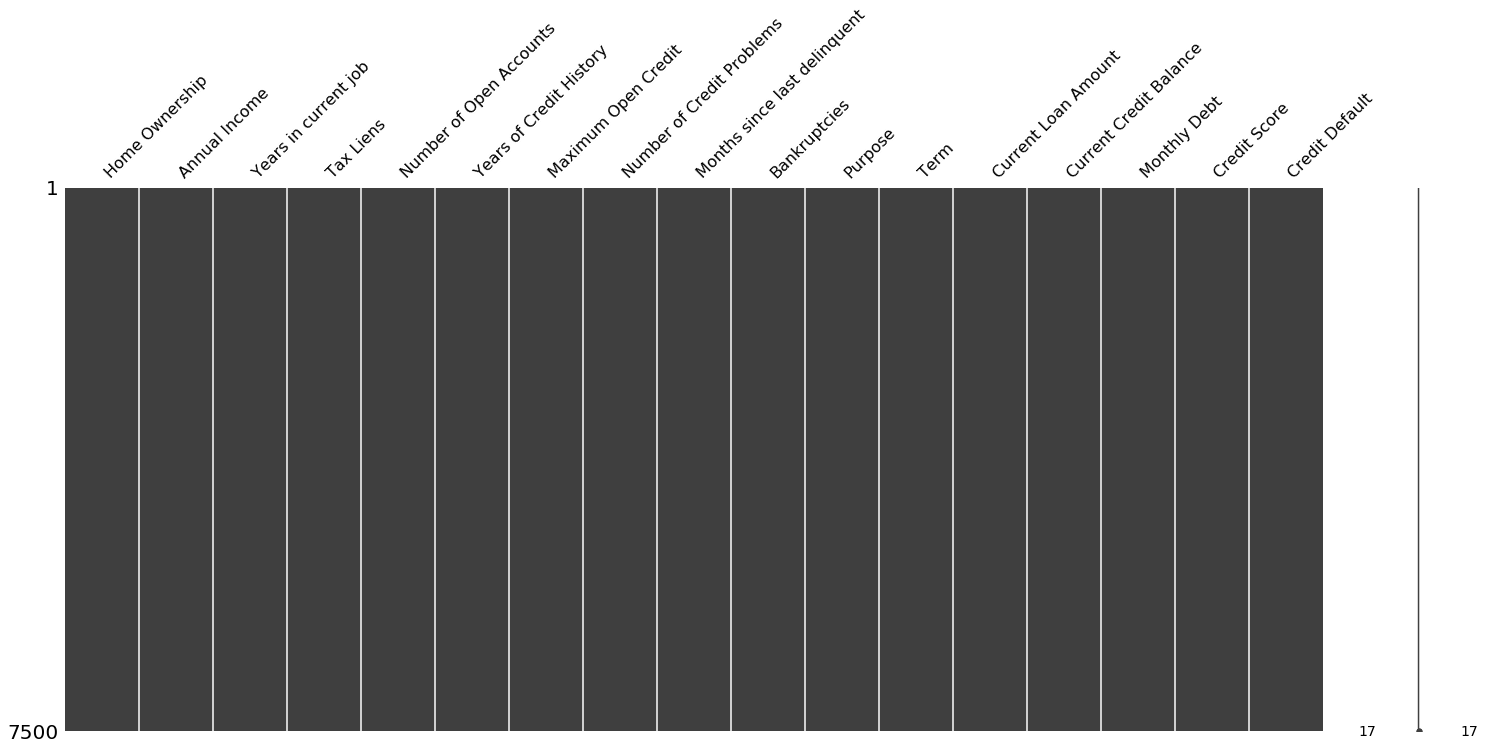

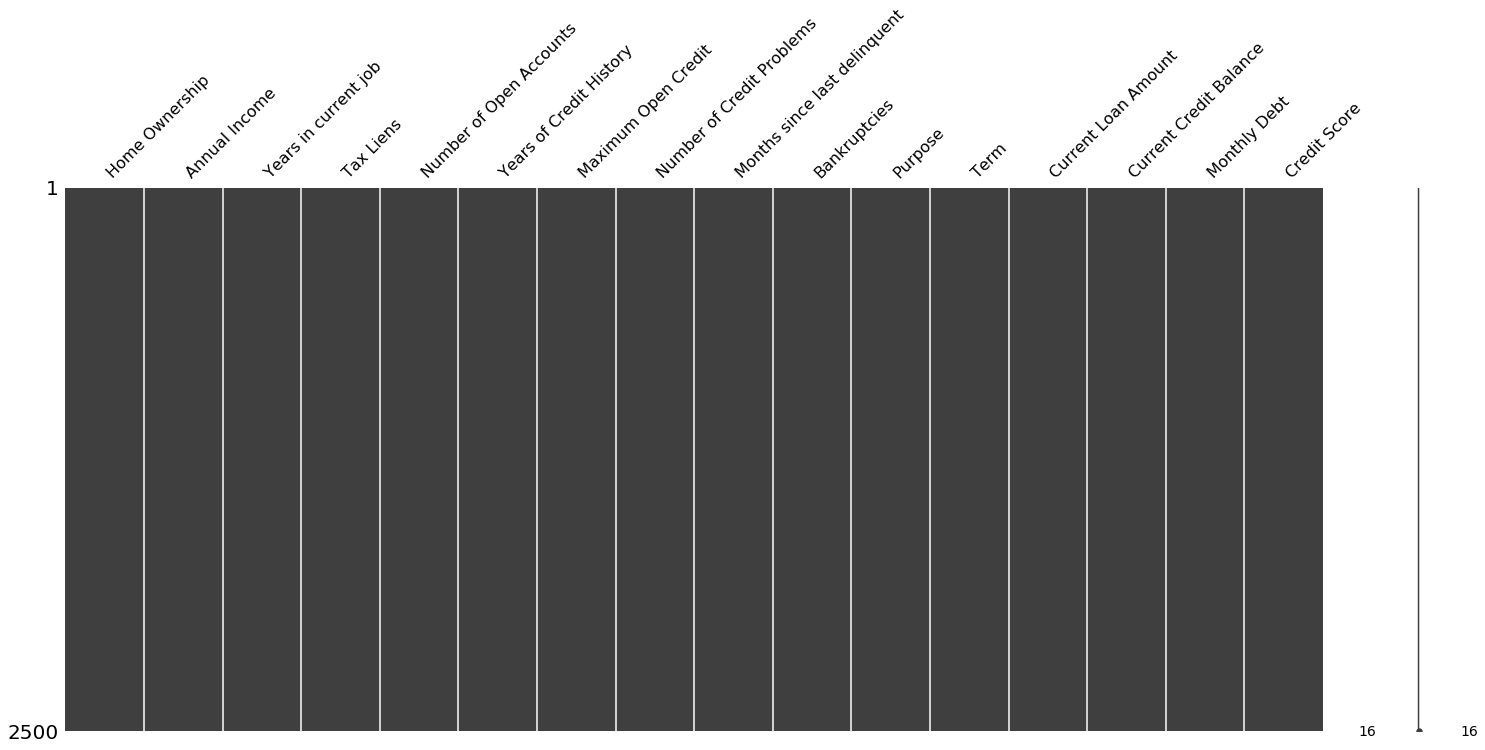

In [507]:
view_matrix_out(df_train, df_test)